In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
G_hydro_1 = pd.read_excel('y_LowerOIrangeEvW_OrigFile.xlsx','y_LowerOIrangeEvW_OrigFile')

In [3]:
# I will only use these following columns
# total number of columns: 20
df1 = G_hydro_1[[
                             'Monitoring Point Name',
                             'Latitude',
                             'Longitude',
                             'Drainage Region Name',
                             'Sample Start Date',
                             'pH-Diss-Water (PH) (pH units) Result',
                             'EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result',
                             'DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result',
                             'Ca-Diss-Water (CALCIUM) (mg/L) Result',
                             'Mg-Diss-Water (MAGNESIUM) (mg/L) Result',
                             'Na-Diss-Water (SODIUM) (mg/L) Result',
                             'K-Diss-Water (POTASSIUM) (mg/L) Result',
                             'TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result',
                             'Cl-Diss-Water (CHLORIDE) (mg/L) Result',
                             'SO4-Diss-Water (SULPHATE) (mg/L) Result',
                             'NO3+NO2-N-Diss-Water (NITRATE + NITRITE NITROGEN) (mg/L) Result',
                             'F-Diss-Water (FLUORIDE) (mg/L) Result',
                             'NH4-N-Diss-Water (AMMONIUM NITROGEN) (mg/L) Result',
                             'PO4-P-Diss-Water (ORTHO PHOSPHATE AS PHOSPHORUS) (mg/L) Result',
                             'Si-Diss-Water (SILICON) (mg/L) Result']]

In [4]:
# I create a new df with better naming
# 
df = pd.DataFrame()
df['Drainage Region Name'] = df1['Drainage Region Name']
df['DMS (mg/L)'] = df1['DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result']
df['Ca (mg/L)'] = df1['Ca-Diss-Water (CALCIUM) (mg/L) Result']
df['Mg (mg/L)'] = df1['Mg-Diss-Water (MAGNESIUM) (mg/L) Result']
df['Na (mg/L)']= df1['Na-Diss-Water (SODIUM) (mg/L) Result']
df['K (mg/L)'] = df1['K-Diss-Water (POTASSIUM) (mg/L) Result']
df['HCO3 (mg/L)'] = df1['TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result'] * 1.219
df['Cl (mg/L)'] = df1['Cl-Diss-Water (CHLORIDE) (mg/L) Result']
df['SO4 (mg/L)'] = df1['SO4-Diss-Water (SULPHATE) (mg/L) Result']
df['NO3+NO2-N (mg/L)'] = df1['NO3+NO2-N-Diss-Water (NITRATE + NITRITE NITROGEN) (mg/L) Result']
df['F (mg/L)'] = df1['F-Diss-Water (FLUORIDE) (mg/L) Result']

In [5]:
df.dropna(inplace=True)

In [6]:
df_mqL = pd.DataFrame()
df_mqL['DMS (mg/L)'] = df['DMS (mg/L)']
df_mqL['Drainage Region Name'] = df['Drainage Region Name']
df_mqL['Ca (mq/L)'] = df['Ca (mg/L)'] *0.0499
df_mqL['Mg (mq/L)'] = df['Mg (mg/L)'] *0.08224
df_mqL['Na (mq/L)']= df['Na (mg/L)'] *0.0435
df_mqL['K (mq/L)'] = df['K (mg/L)'] *0.02558
df_mqL['HCO3 (mq/L)'] = df["HCO3 (mg/L)"] * 0.01639
df_mqL['Cl (mq/L)'] = df['Cl (mg/L)'] * 0.0282
df_mqL['SO4 (mq/L)'] = df['SO4 (mg/L)']* 0.02082
df_mqL['NO3+NO2-N (mq/L)'] = df['NO3+NO2-N (mg/L)']* 0.01613
df_mqL['F (mq/L)'] = df['F (mg/L)']* 0.05263

In [7]:
# Define the mapping between drainage regions and resource units 23 GRU's
resource_units = {
    'GRU1': ['D71A','D71C','D71D','D72A','D72B','D73B','D72C','D73C','D73D','D73E','D73F'],
    
    'GRU2': ['D81A','D81B','D81D','D81E','D81F','D81G'],
    
    'GRU3': ['D82A','D82B','D82C','D82D',],
    
    'GRU4.1': ['D82E','D82F','D82G','D82H','D82J','D82K','D82L'],
    
    'GRU4.2': ['F10A','F10B','F10C','F20C','F20D','F20E'],
    
    'GRU6.1': ['D61A','D61B','D61C','D61D','D61E','D61F','D61G','D61H','D62C','D62D'],
    
    'GRU6.2': ['D61J','D61K','D61L','D61M','D62A','D62B','D62E','D62F'],
    
    'GRU6.3': ['D62H','D62G','D62J'],
    
    'GRU7.1': ['D51B','D51C','D52C','D55A','D55B','D55C','D55D','D55E','D55G','D55K','D56D','D56F','D56G','D56H','D56J'],
    
    'GRU7.2': ['D54A','D54B','D54C','D55F','D55H','D55J','D55L','D52D','D52E','D52F','D58A'],
    
    'GRU7.3': ['D53F','D54D','D54F','D57D'],
    
    'GRU7.4': ['D51A','D52A','D52B','D56A','D56B','D56C','D56E'],
    
    'GRU7.5': ['D54E','D55M','D57A','D57B','D57C','D58B','D58C'],
    
    'GRU7.6': ['D53D','D53G','D54G','D57E'],
    
    'GRU7.7': ['D53A','D53B','D53C','D53E','D53H','D53J'],
    
    'GRU8.1': ['F30A','F30B','F30C','F30D','F30E'],
    
    'GRU8.2': ['F40B','F40C','F40E','F40G','F50A','F50B','F50C','F50E','F50F','F20A','F20B','F20B','F20B','F30F','F30G'],
    
    'GRU8.3': ['F40A','F40D','F40F','F40H','F50G','F60A','F60B','F60C','F60D','F60E'],
    
    'GRU9.1': ['D41B','D41C','D41D','D41E','D41F','D41H','D41M'],
    
    'GRU9.2': ['D41G','D41L','D41J','D41K'],
    
    'GRU9.3': ['D71B','D73A'],
    
    'GRU10.1': ['D42A','D42B','D42C','D42D'],
    
    'GRU10.2': ['D42E','D81C']
}

# Create a new column 'resource_unit'
df_mqL['resource_unit'] = None
df['resource_unit'] = None

# Populate the 'resource_unit' column
def get_resource_unit(drainage_region):
    for ru, regions in resource_units.items():
        if drainage_region in regions:
            return ru
    return None

df_mqL['resource_unit'] = df_mqL['Drainage Region Name'].apply(get_resource_unit)
df['resource_unit'] = df['Drainage Region Name'].apply(get_resource_unit)

# Heatmaps of all GRU's with more than 200 entries.

In [8]:
df_GRU6_1 = df_mqL[df_mqL['resource_unit']=='GRU6.1']
df_GRU6_1_mgL = df[df['resource_unit']=='GRU6.1']

In [9]:
print(df_GRU6_1_mgL.describe())

        DMS (mg/L)    Ca (mg/L)    Mg (mg/L)    Na (mg/L)     K (mg/L)  \
count  2331.000000  2331.000000  2331.000000  2331.000000  2331.000000   
mean    917.307613    61.127182    52.354921   139.095196     4.002991   
std     824.164181    52.922044    49.163812   181.064349     9.789488   
min     191.000000     1.900000     0.500000     6.309000     0.150000   
25%     498.500000    29.900000    30.977500    49.353500     1.510000   
50%     653.102000    51.500000    39.200000    74.500000     2.570000   
75%     971.000000    74.900000    57.650000   151.000000     4.200000   
max    8932.000000   813.500000   583.000000  2191.000000   370.690000   

       HCO3 (mg/L)    Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)     F (mg/L)  
count  2331.000000  2331.000000  2331.000000       2331.000000  2331.000000  
mean    284.632473   203.499320   148.542559          5.127569     1.032895  
std     120.686189   389.855958   218.267093          5.958943     0.747386  
min       2.438000   

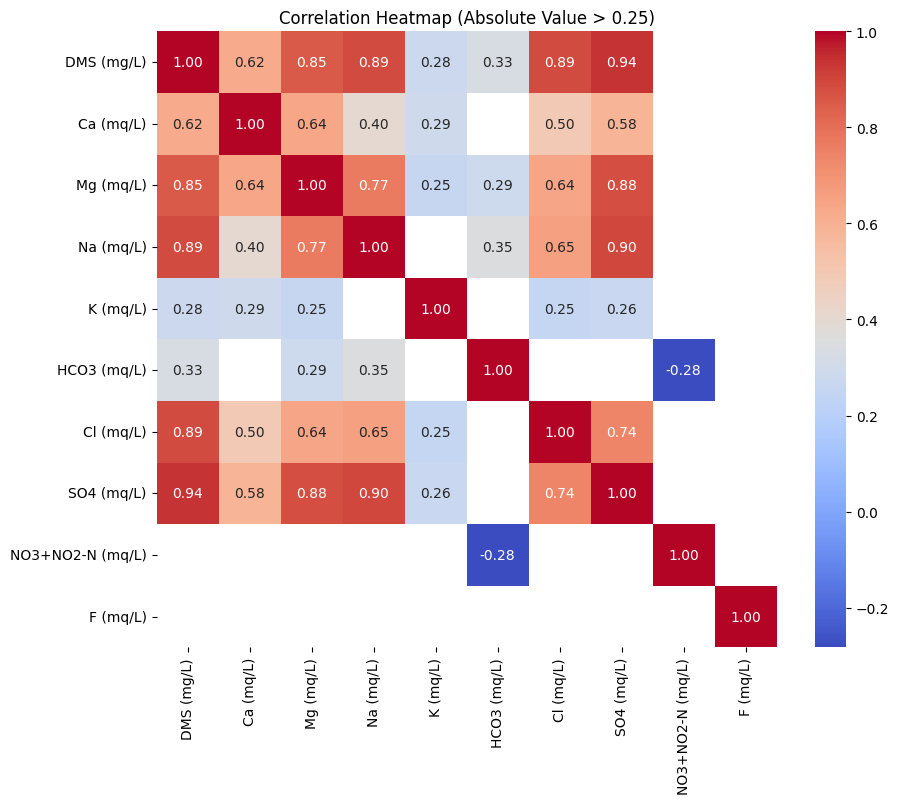

In [10]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU6_1.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

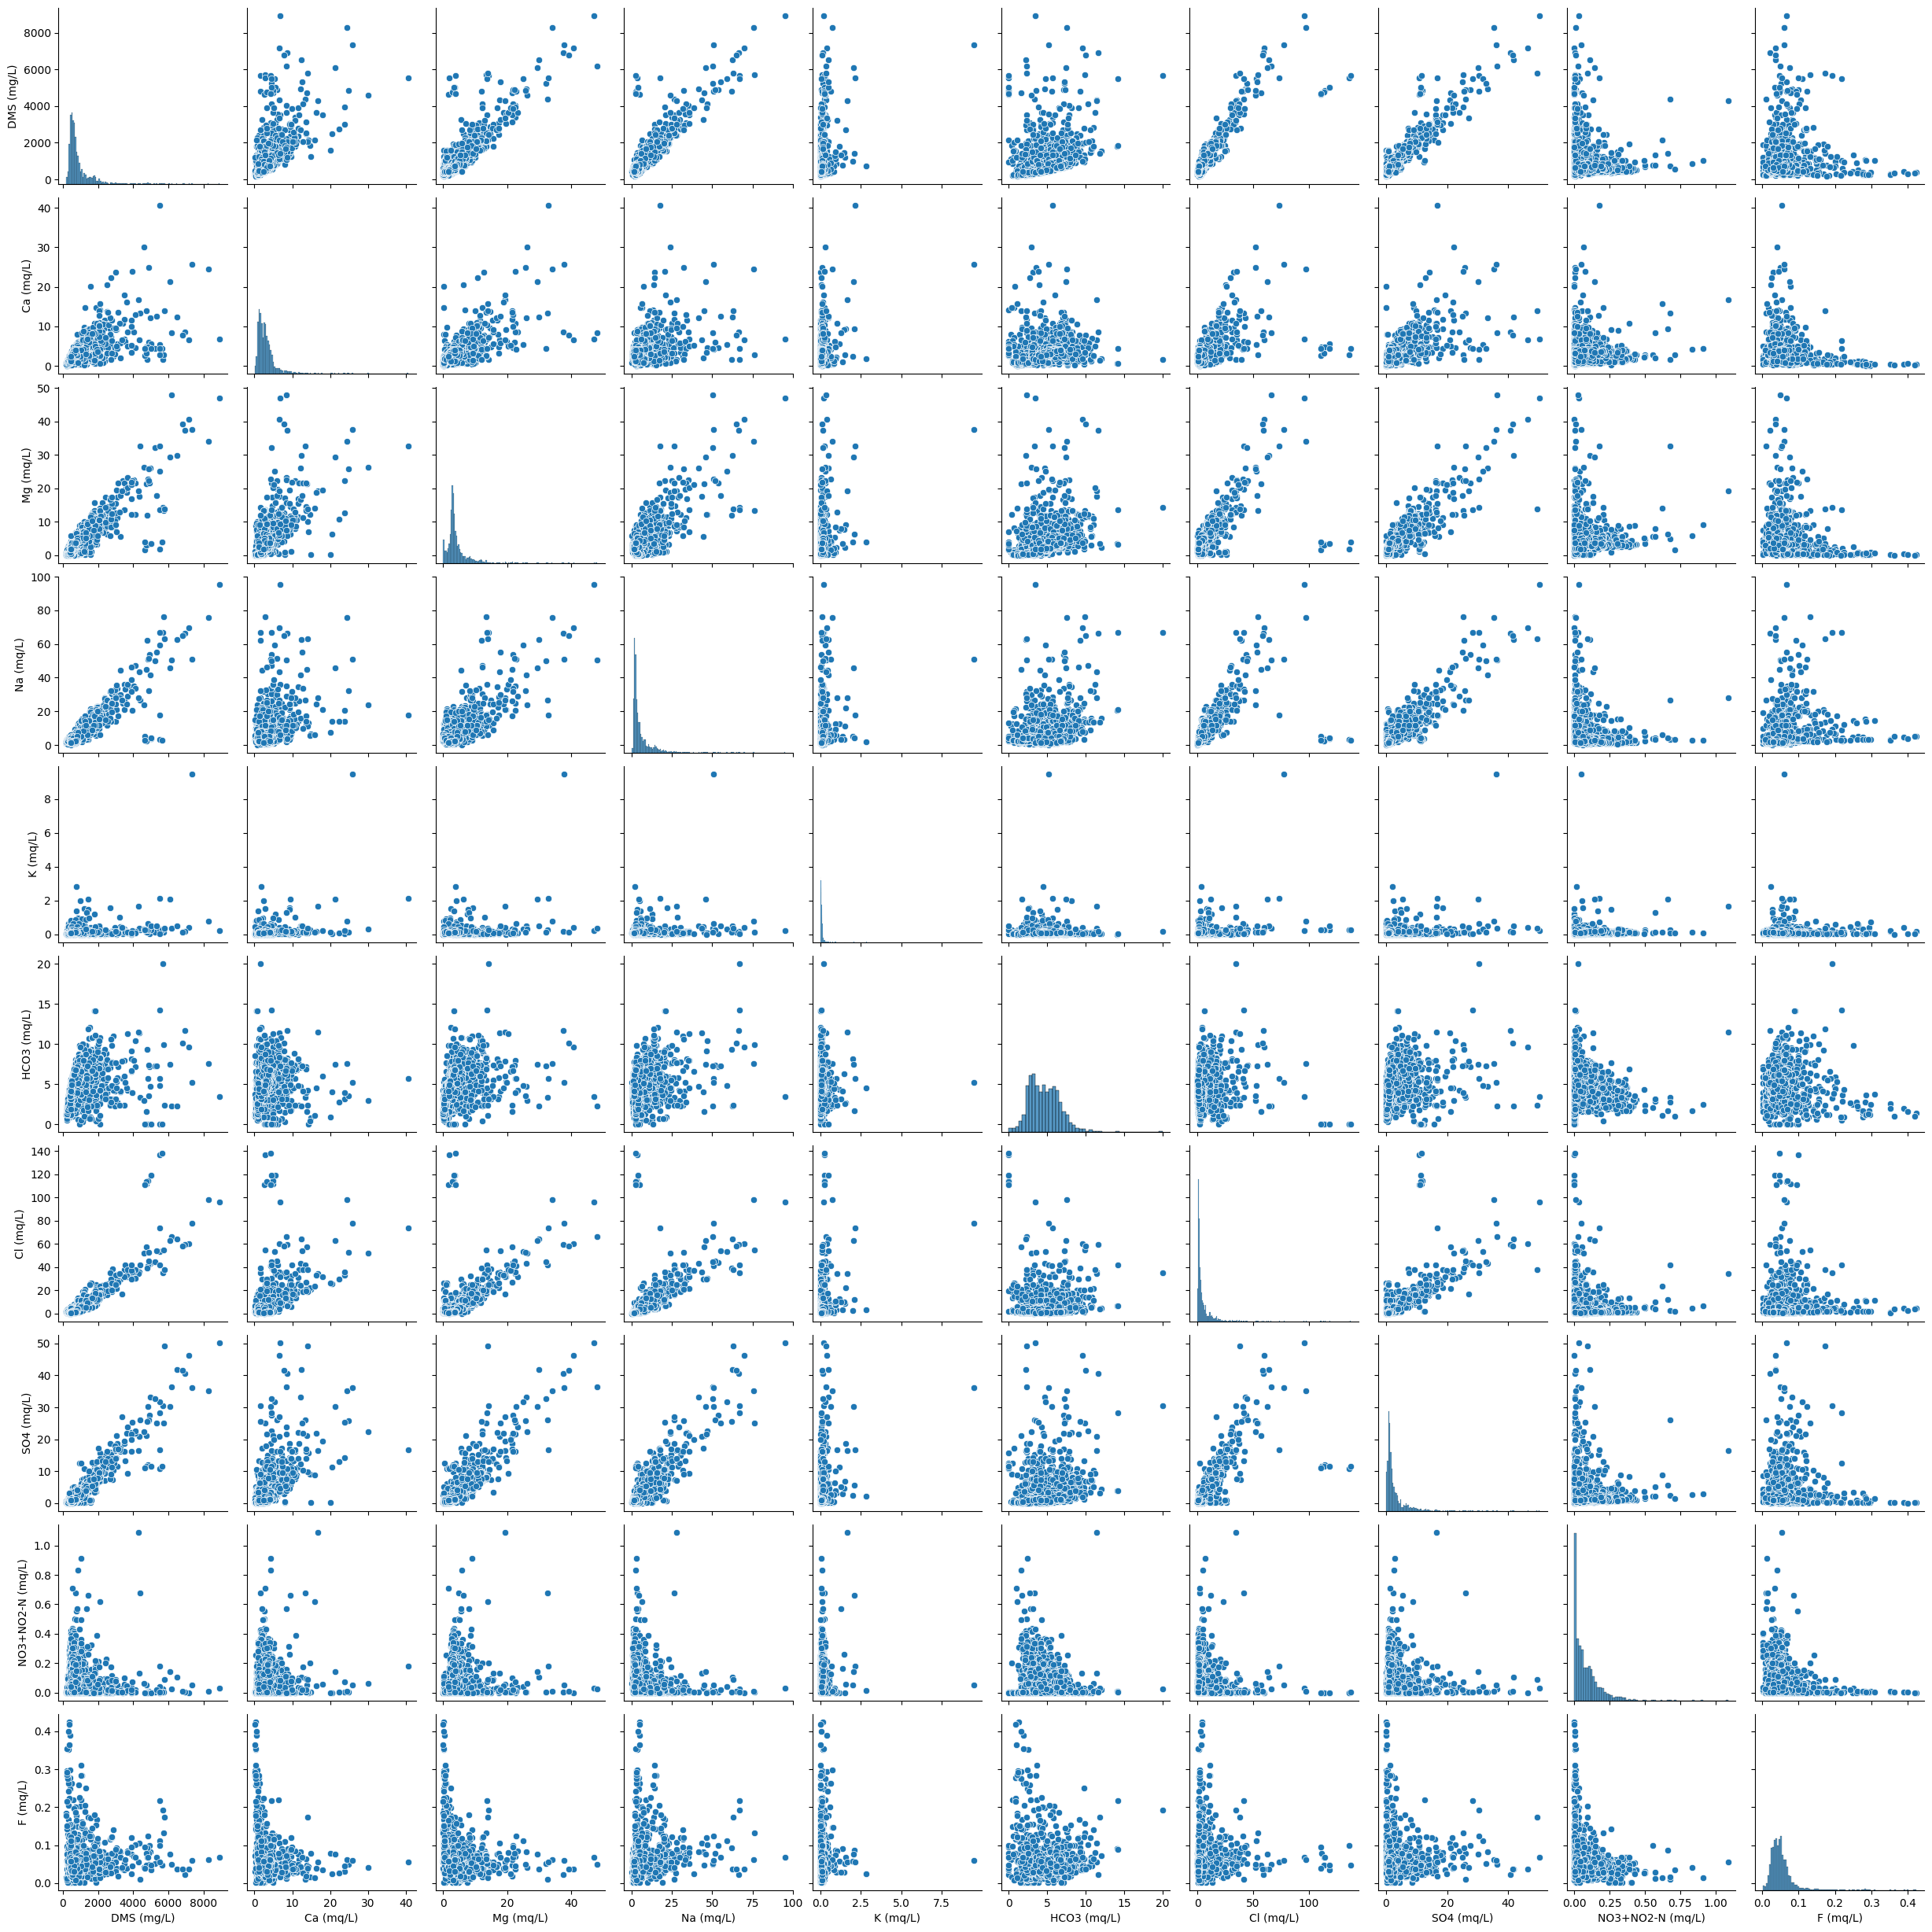

In [11]:
sns.pairplot(df_GRU6_1)
plt.show()

In [12]:
df_GRU10_1  = df_mqL[df_mqL['resource_unit']=='GRU10.1']  
df_GRU10_1_mgL = df[df['resource_unit']=='GRU10.1']
print(df_GRU10_1_mgL.describe())

          DMS (mg/L)    Ca (mg/L)    Mg (mg/L)     Na (mg/L)     K (mg/L)  \
count    1935.000000  1935.000000  1935.000000   1935.000000  1935.000000   
mean     5893.475069   101.138879    47.669031   1819.664296    17.068334   
std     11478.652177   212.465435    76.364176   4132.941444    47.683918   
min        19.000000     0.500000     0.500000      1.000000     0.150000   
25%      1535.000000     8.200000     7.000000    364.600000     3.575000   
50%      2783.000000    43.400000    25.165000    749.900000     7.880000   
75%      5498.500000   116.850000    51.600000   1607.100000    16.615000   
max    226281.000000  3801.900000   974.400000  86532.400000  1766.810000   

        HCO3 (mg/L)     Cl (mg/L)    SO4 (mg/L)  NO3+NO2-N (mg/L)     F (mg/L)  
count   1935.000000   1935.000000   1935.000000       1935.000000  1935.000000  
mean     946.529310   1779.286989   1042.514598         30.484705     3.566720  
std     1189.350944   4944.029555   2252.885790         44.1337

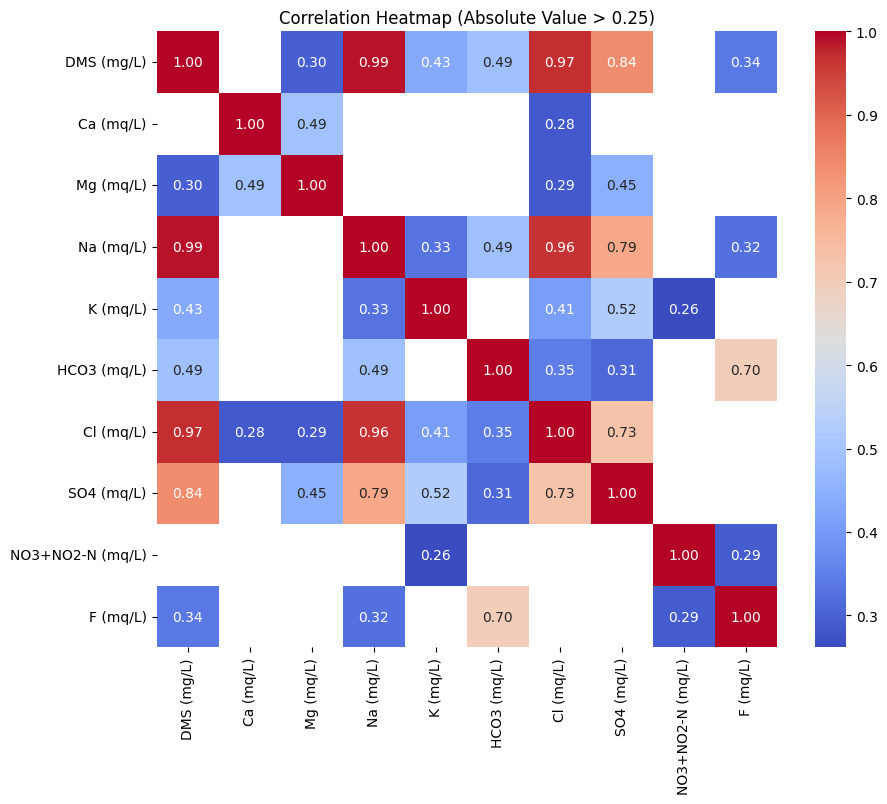

In [13]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU10_1.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [14]:
df_GRU7_1    = df_mqL[df_mqL['resource_unit']=='GRU7.1'] 
df_GRU7_1_mgL = df[df['resource_unit']=='GRU7.1']
print(df_GRU7_1_mgL.describe())

        DMS (mg/L)    Ca (mg/L)    Mg (mg/L)    Na (mg/L)     K (mg/L)  \
count  1128.000000  1128.000000  1128.000000  1128.000000  1128.000000   
mean    892.135876    84.241018    41.786301   122.186613     3.658497   
std     586.718893    60.585727    33.433828   125.034624     2.979442   
min     237.000000     7.600000     0.500000    15.600000     0.150000   
25%     626.000000    58.678000    28.710500    63.949500     2.027500   
50%     748.500000    72.000000    36.950000    91.700000     2.980000   
75%     944.011500    89.825000    47.210750   137.225000     4.470000   
max    7215.000000   625.200000   498.400000  1939.000000    34.180000   

       HCO3 (mg/L)    Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)     F (mg/L)  
count  1128.000000  1128.000000  1128.000000       1128.000000  1128.000000  
mean    324.699821   149.488081   142.111017          4.813157     1.172310  
std      94.752961   214.830964   209.047723          4.815246     0.601361  
min      37.301400   

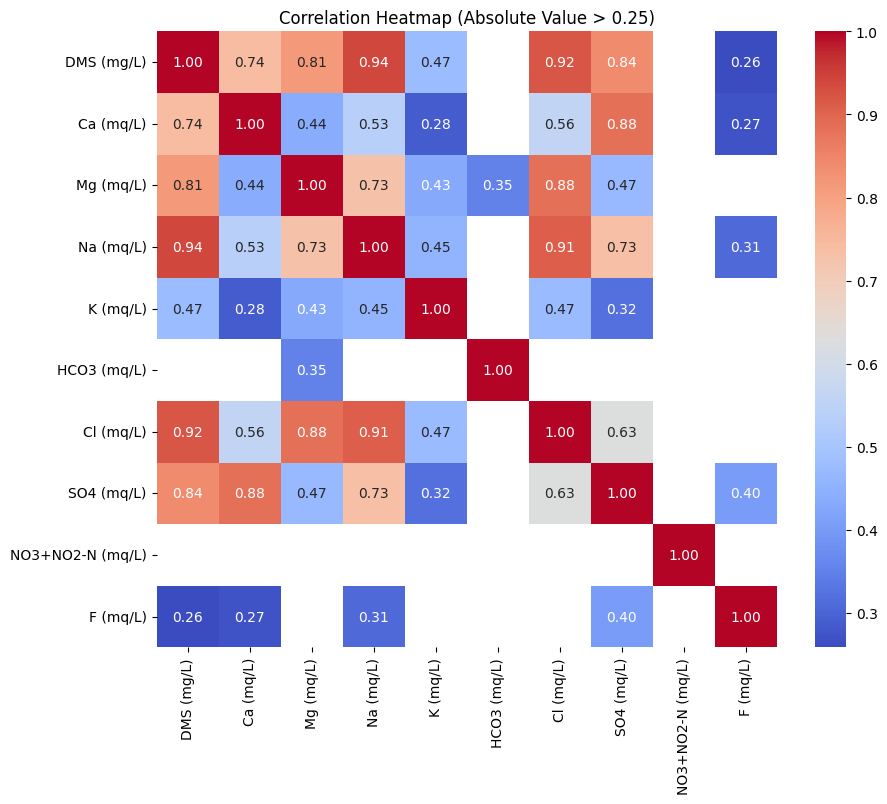

In [15]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU7_1.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [16]:
df_GRU1= df_mqL[df_mqL['resource_unit']=='GRU1'] 
df_GRU1_mgL = df[df['resource_unit']=='GRU1']
print(df_GRU1_mgL.describe())

        DMS (mg/L)   Ca (mg/L)   Mg (mg/L)    Na (mg/L)    K (mg/L)  \
count   910.000000  910.000000  910.000000   910.000000  910.000000   
mean   1139.643514   82.001564   68.746562   164.217127   12.232303   
std    1064.860866   77.033641   66.247605   239.265268   17.226166   
min      19.181000    0.500000    0.470000     0.440000    0.150000   
25%     597.619000   32.850000   31.049750    39.000000    3.192500   
50%     890.000000   69.948500   58.843000    86.750000    7.306000   
75%    1370.118000  103.000000   86.375000   205.475000   12.930000   
max    9912.000000  616.100000  574.700000  2587.252000  187.659000   

       HCO3 (mg/L)    Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   910.000000   910.000000   910.000000        910.000000  910.000000  
mean    288.564340   255.445871   182.483570         19.114367    1.015765  
std     156.931310   370.887468   293.704727         27.092827    1.308837  
min       2.438000     0.500000     0.600000        

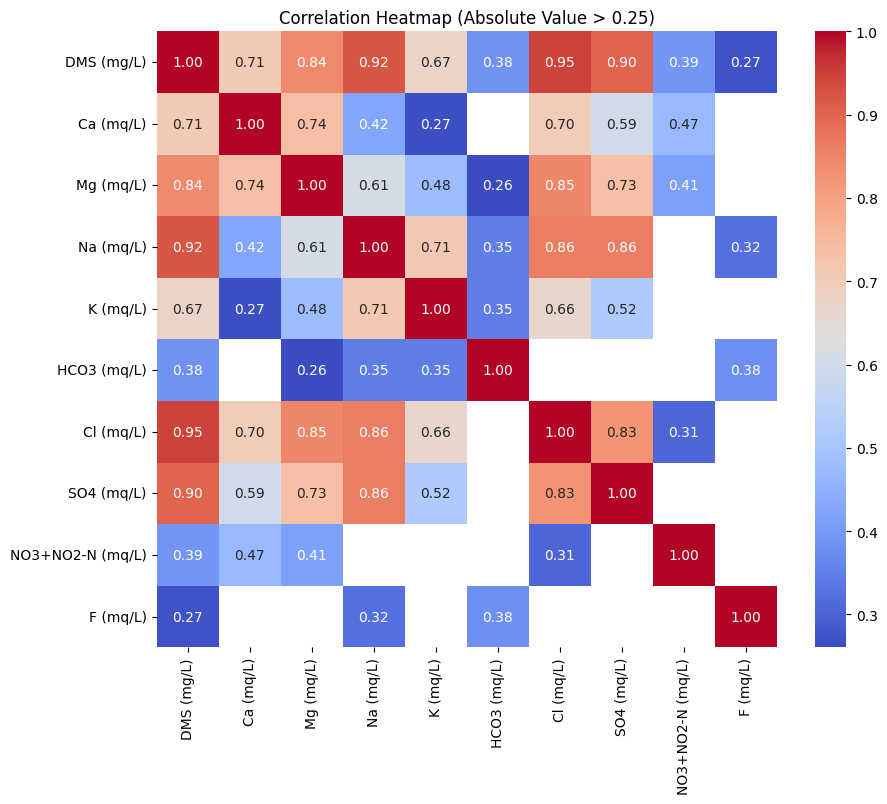

In [17]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU1.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [18]:
df_GRU7_2 = df_mqL[df_mqL['resource_unit']=='GRU7.2']
df_GRU7_2_mgL = df[df['resource_unit']=='GRU7.2']
print(df_GRU7_2_mgL.describe())

         DMS (mg/L)    Ca (mg/L)    Mg (mg/L)     Na (mg/L)    K (mg/L)  \
count    552.000000   552.000000   552.000000    552.000000  552.000000   
mean    2283.673603   134.929014    63.020100    570.244705    5.483694   
std     6700.626745   436.004953   156.801659   2015.619439    9.032682   
min       34.896000     1.300000     0.500000      1.000000    0.150000   
25%      503.874250    30.175000    16.175000     86.125000    1.157500   
50%      734.500000    49.900000    31.073000    117.700000    2.400000   
75%     1342.750000    90.800000    51.000000    249.639000    5.002500   
max    97880.000000  6855.600000  2722.000000  30882.500000   92.750000   

       HCO3 (mg/L)     Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   552.000000    552.000000   552.000000        552.000000  552.000000  
mean    302.934637    940.109578   248.631560          3.645306    1.355438  
std     101.971186   3930.861560   472.156558          7.616483    1.731089  
min       2.

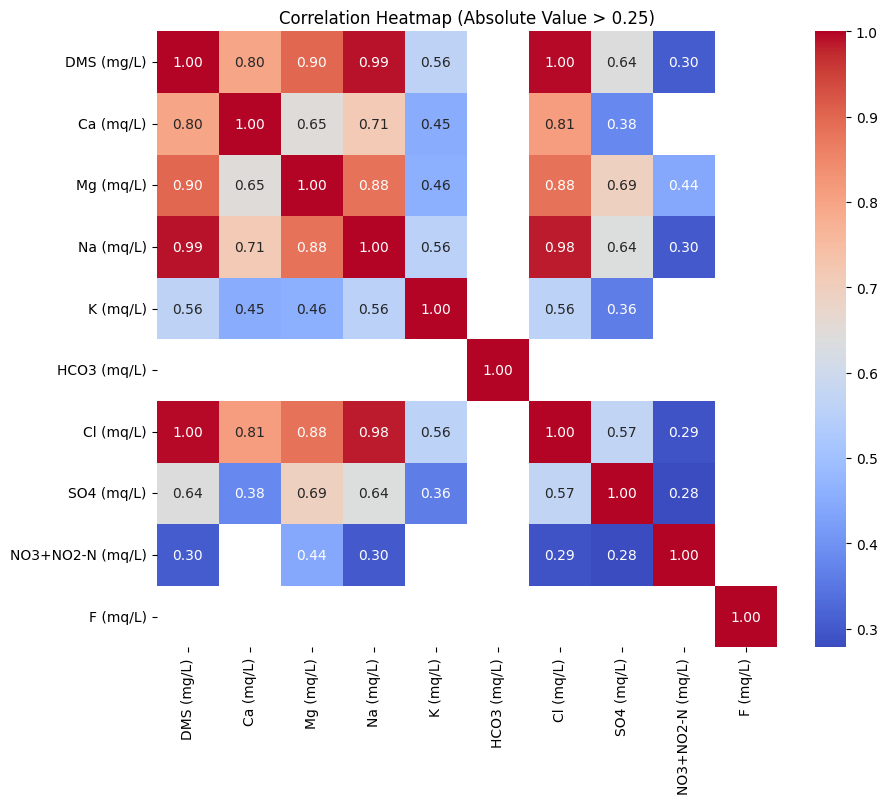

In [19]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU7_2.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [20]:
df_GRU6_2 = df_mqL[df_mqL['resource_unit']=='GRU6.2']     
df_GRU6_2_mgL = df[df['resource_unit']=='GRU6.2']
print(df_GRU6_2_mgL.describe())

          DMS (mg/L)   Ca (mg/L)   Mg (mg/L)     Na (mg/L)    K (mg/L)  \
count     453.000000  453.000000  453.000000    453.000000  453.000000   
mean     1870.247018   70.853106   62.337528    469.980828    6.267662   
std     10675.969738   63.621558   70.336877   3893.668222   32.038599   
min       199.000000    0.500000    0.500000     12.800000    0.150000   
25%       606.000000   41.600000   38.000000     63.300000    1.890000   
50%       765.927000   62.454000   47.300000     88.700000    2.590000   
75%      1023.843000   82.000000   60.000000    155.100000    3.900000   
max    159300.000000  759.000000  780.000000  57815.000000  491.540000   

       HCO3 (mg/L)     Cl (mg/L)    SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   453.000000    453.000000    453.000000        453.000000  453.000000  
mean    334.244795    637.770558    252.496726          7.914029    0.950088  
std     190.537032   5295.608058   1403.417828          8.932639    1.361764  
min       2.43800

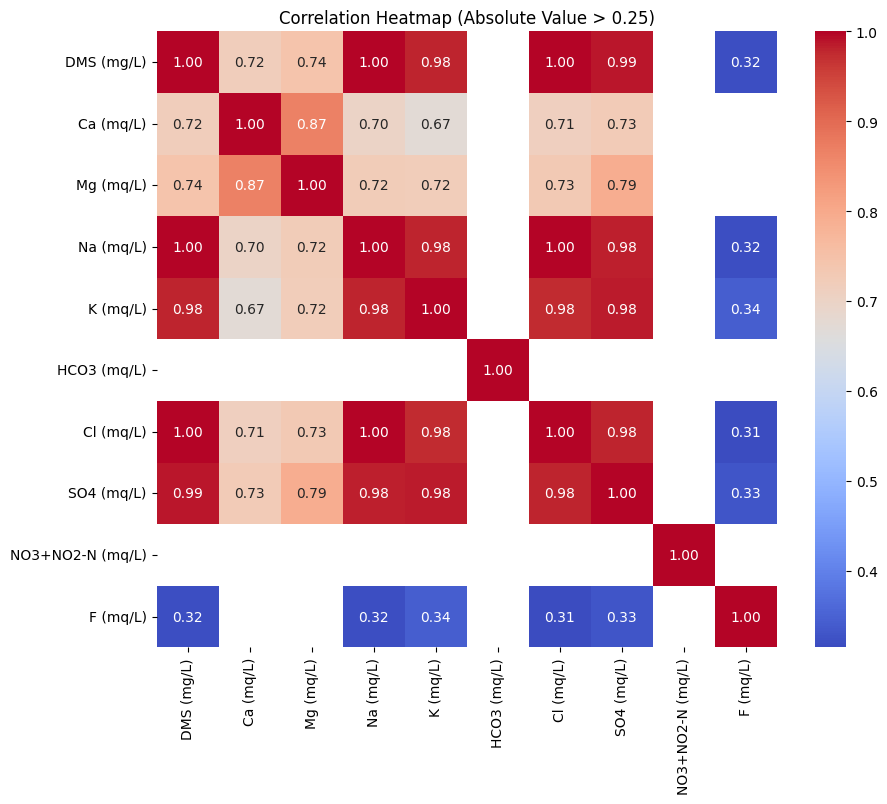

In [21]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU6_2.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [22]:
df_GRU7_4 = df_mqL[df_mqL['resource_unit']=='GRU7.4']     
df_GRU7_4_mgL = df[df['resource_unit']=='GRU7.4']
print(df_GRU7_4_mgL.describe())

        DMS (mg/L)   Ca (mg/L)   Mg (mg/L)   Na (mg/L)    K (mg/L)  \
count   383.000000  383.000000  383.000000  383.000000  383.000000   
mean    881.765037   90.842339   36.300747  128.624350    2.917107   
std     467.890494   65.452027   26.273166   94.852422    3.358192   
min     169.000000    4.200000    0.500000   15.000000    0.150000   
25%     620.500000   59.350000   20.300000   77.150000    1.410000   
50%     758.000000   76.000000   30.200000  105.400000    2.230000   
75%    1012.000000  101.500000   46.788000  143.100000    3.270000   
max    4052.111000  722.100000  229.600000  741.400000   41.650000   

       HCO3 (mg/L)    Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   383.000000   383.000000   383.000000        383.000000  383.000000  
mean    291.541533   192.693909   129.258533          1.761355    1.230146  
std      88.459932   190.218063   141.460894          3.471262    0.992459  
min      16.578400    17.300000     5.100000          0.02000

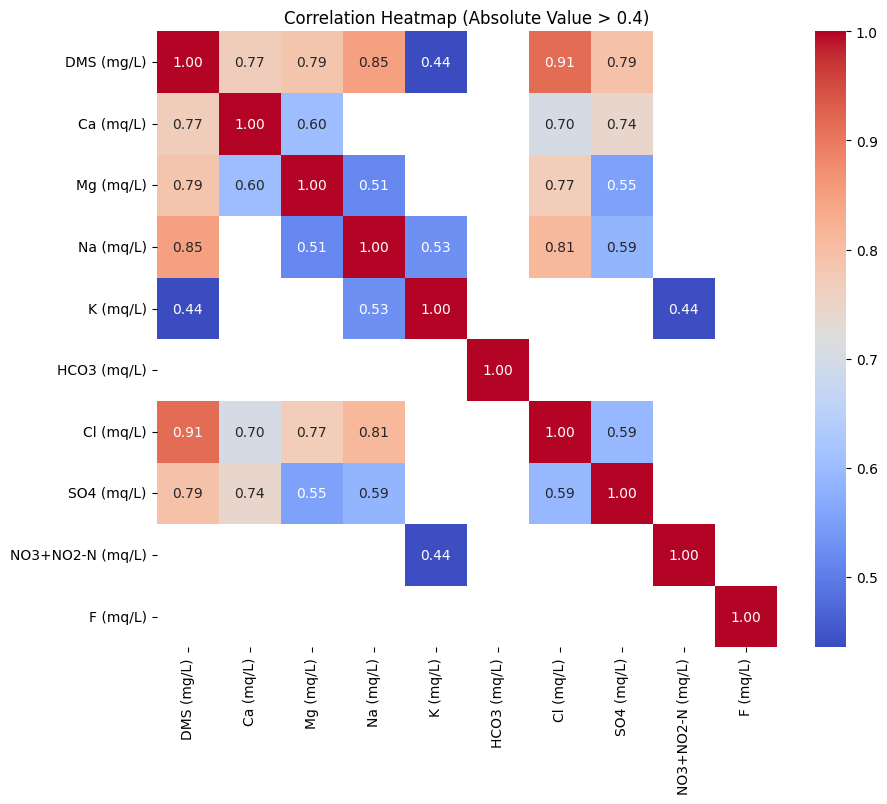

In [23]:
# Create a mask for correlations greater than 0.4
correlation_mqL = df_GRU7_4.corr()

corr_mask = np.abs(correlation_mqL) > 0.4


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.4)')
plt.show()

In [24]:
df_GRU10_2 = df_mqL[df_mqL['resource_unit']=='GRU10.2']    
df_GRU10_2_mgL = df[df['resource_unit']=='GRU10.2']
print(df_GRU10_2_mgL.describe())

          DMS (mg/L)    Ca (mg/L)    Mg (mg/L)     Na (mg/L)    K (mg/L)  \
count     336.000000   336.000000   336.000000    336.000000  336.000000   
mean     3369.133479   159.163833    68.550018    898.135122   16.416265   
std      7578.596454   191.260991   124.603988   2544.611220   50.087970   
min       211.000000     0.500000     0.500000      6.600000    0.930000   
25%      1139.770250    70.025000    27.650000    200.087500    5.035000   
50%      1781.282500   106.837500    35.803500    414.350000    7.825000   
75%      3217.346250   156.750000    65.297250    914.825000   15.042500   
max    103566.000000  1373.100000  1041.100000  36131.700000  637.920000   

       HCO3 (mg/L)     Cl (mg/L)    SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   336.000000    336.000000    336.000000        336.000000  336.000000  
mean    401.176013   1186.309670    554.239497         18.457074    3.141976  
std     170.901766   3928.420638   1037.508509         25.785223    1.989024  

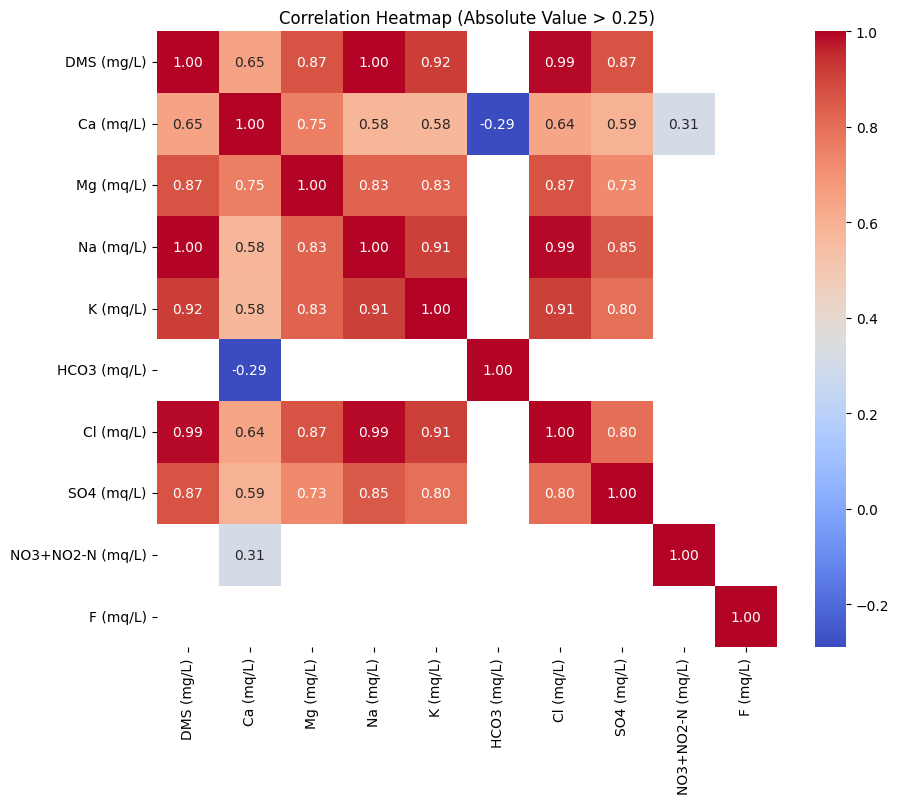

In [25]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU10_2.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [26]:
df_GRU7_7 = df_mqL[df_mqL['resource_unit']=='GRU7.7']     
df_GRU7_7_mgL = df[df['resource_unit']=='GRU7.7']
print(df_GRU7_7_mgL.describe())

         DMS (mg/L)    Ca (mg/L)   Mg (mg/L)    Na (mg/L)    K (mg/L)  \
count    363.000000   363.000000  363.000000   363.000000  363.000000   
mean    2370.177667   142.548399   72.117526   555.283802   14.381314   
std     2859.073255   135.674360   88.496746   823.497351   18.559355   
min      143.000000    11.000000    2.400000    20.000000    0.630000   
25%      828.500000    68.550000   26.400000   136.250000    4.170000   
50%     1285.000000    96.595000   40.800000   247.300000    7.770000   
75%     2540.500000   173.900000   85.200000   597.357000   16.907000   
max    26916.000000  1151.900000  890.200000  7944.600000  154.513000   

       HCO3 (mg/L)     Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   363.000000    363.000000   363.000000        363.000000  363.000000  
mean    301.068264    800.543069   448.637634          7.266887    3.172796  
std      96.752646   1235.231272   647.151883         15.846041    1.726118  
min       9.752000     13.4000

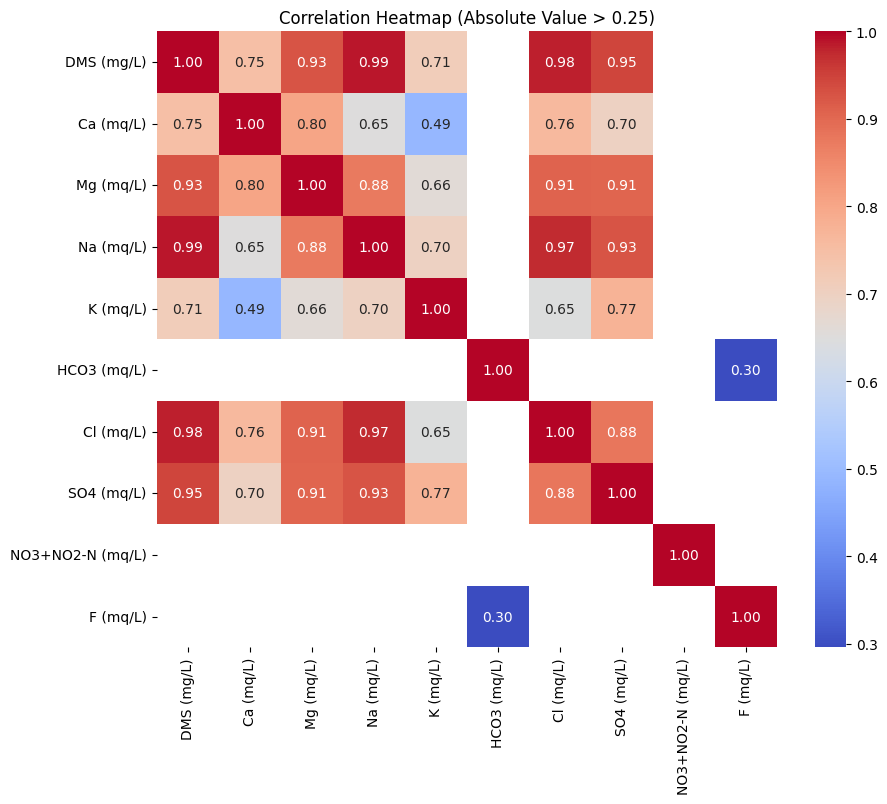

In [27]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU7_7.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [28]:
df_GRU7_6 = df_mqL[df_mqL['resource_unit']=='GRU7.6']     
df_GRU7_6_mgL = df[df['resource_unit']=='GRU7.6']
print(df_GRU7_6_mgL.describe())

         DMS (mg/L)    Ca (mg/L)   Mg (mg/L)    Na (mg/L)    K (mg/L)  \
count    255.000000   255.000000  255.000000   255.000000  255.000000   
mean    3562.471592   230.861557  119.109635   787.079835   22.353396   
std     2954.287582   209.879596   99.464486   821.050266   19.059714   
min      408.000000    10.100000    4.397000    24.900000    0.150000   
25%     1373.500000    91.750000   53.739500   204.800000   10.180000   
50%     2612.000000   167.100000   91.900000   489.000000   16.942000   
75%     4849.016000   295.950000  158.850000  1051.026500   25.485000   
max    20125.000000  1507.300000  698.100000  4383.400000  121.070000   

       HCO3 (mg/L)    Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   255.000000   255.000000   255.000000        255.000000  255.000000  
mean    296.086557  1132.556690   794.330502         40.120678    2.213655  
std     137.547547  1132.285778   735.111254         66.056812    1.608779  
min       2.438000    28.317000   

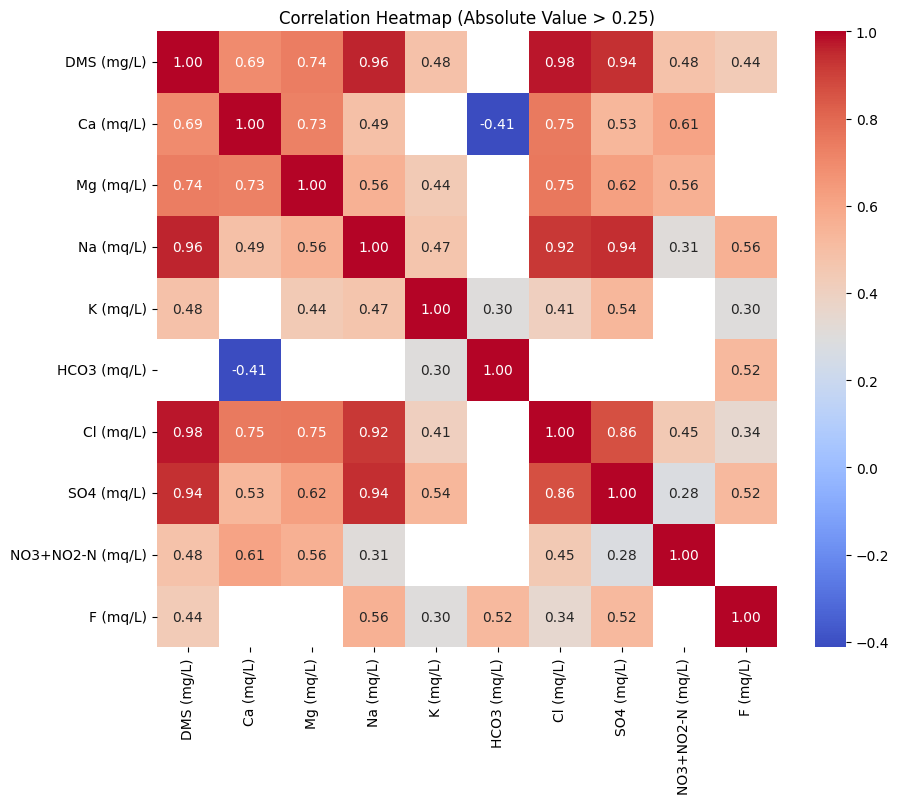

In [29]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU7_6.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [30]:
df_GRU6_3 = df_mqL[df_mqL['resource_unit']=='GRU6.3']     
df_GRU6_3_mgL = df[df['resource_unit']=='GRU6.3']
print(df_GRU6_3_mgL.describe())

          DMS (mg/L)    Ca (mg/L)    Mg (mg/L)     Na (mg/L)    K (mg/L)  \
count     232.000000   232.000000   232.000000    232.000000  232.000000   
mean     1890.153573   108.288858    95.951931    389.582022    8.858392   
std      7830.843716   133.064392   121.548858   2752.585029   17.307973   
min       176.000000     4.000000     0.500000      3.100000    0.410000   
25%       735.805500    51.863000    48.582000     73.324750    2.252500   
50%       900.500000    72.100000    62.500000    112.850000    4.870000   
75%      1402.250000   124.275000   100.450000    199.400000    9.315000   
max    116344.000000  1477.800000  1061.000000  41215.800000  151.390000   

       HCO3 (mg/L)     Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)    F (mg/L)  
count   232.000000    232.000000   232.000000        232.000000  232.000000  
mean    260.140968    692.435267   261.701681         16.301060    0.602767  
std      88.463511   4380.256629   573.859903         21.514372    0.698964  
min

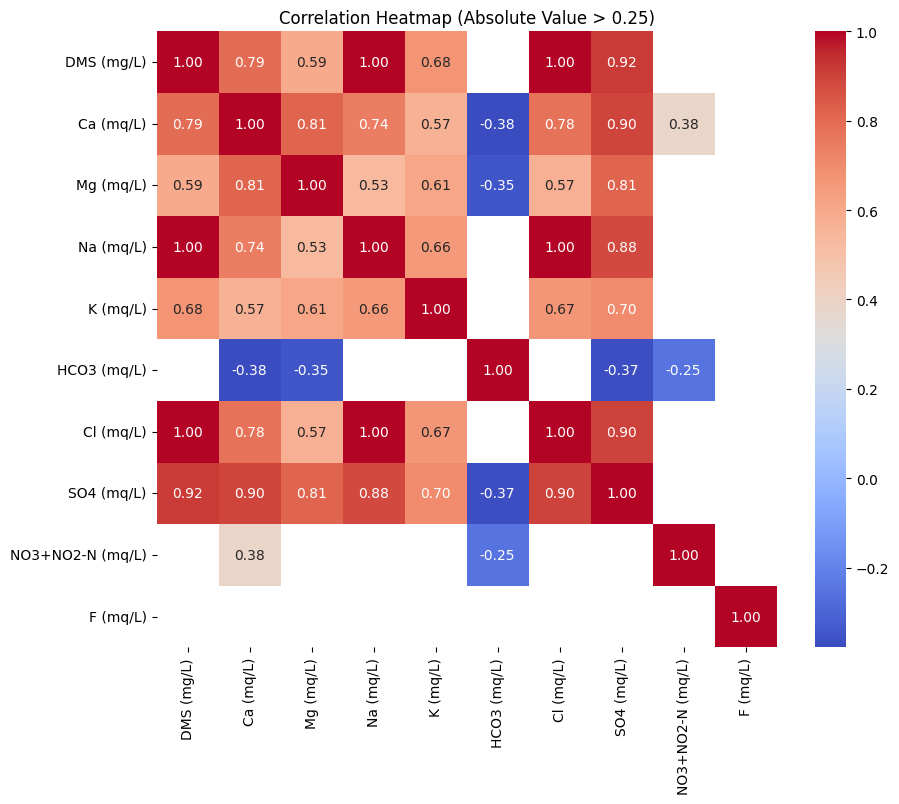

In [31]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU6_3.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()

In [32]:
df_GRU8_2 = df_mqL[df_mqL['resource_unit']=='GRU8.2']
df_GRU8_2_mgL = df[df['resource_unit']=='GRU8.2']
print(df_GRU8_2_mgL.describe())

         DMS (mg/L)    Ca (mg/L)    Mg (mg/L)    Na (mg/L)    K (mg/L)  \
count    391.000000   391.000000   391.000000   391.000000  391.000000   
mean    3335.117256   182.268455   151.971343   801.734642   21.492893   
std     3358.788594   178.757930   167.566659   864.774639   27.708067   
min       99.000000     2.700000     2.200000    10.600000    0.576000   
25%     1260.500000    67.850000    46.438000   261.500000    6.245000   
50%     2311.000000   140.100000    99.900000   493.267000   12.780000   
75%     4570.317000   242.045000   209.800000  1180.100000   27.206500   
max    34153.000000  1419.100000  1333.900000  9316.300000  288.160000   

       HCO3 (mg/L)     Cl (mg/L)   SO4 (mg/L)  NO3+NO2-N (mg/L)     F (mg/L)  
count   391.000000    391.000000   391.000000        391.000000   391.000000  
mean    157.059037   1696.788621   293.098760          5.695524     5.180279  
std      91.655725   1909.049584   272.501873         23.639504    57.551445  
min       2.43800

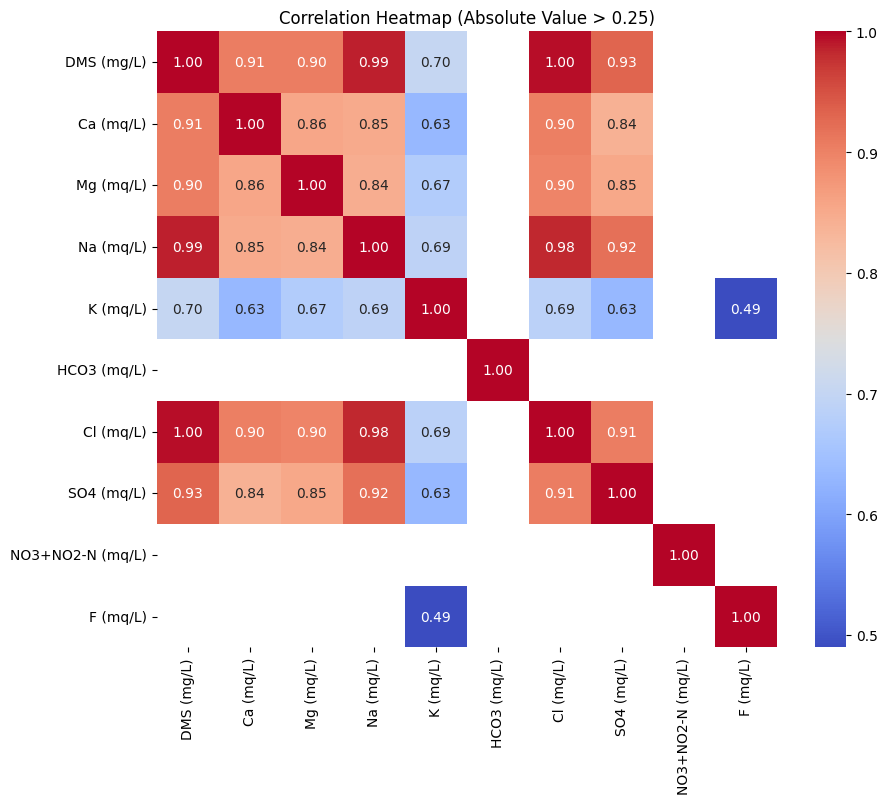

In [33]:
# Create a mask for correlations greater than 0.25
correlation_mqL = df_GRU8_2.corr()

corr_mask = np.abs(correlation_mqL) > 0.25


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_mqL,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            mask=~corr_mask)
plt.title('Correlation Heatmap (Absolute Value > 0.25)')
plt.show()